# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [7]:
df['sex'].replace({0: 'feminino', 1: 'masculino'}, inplace=True)
df['flag_doente'].replace({0: 'saudavel', 1: 'doente'}, inplace=True)

In [8]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True, margins_name='total')

tab_sex['media_doentes'] = tab_sex['doente'] / tab_sex['total']
tab_sex['odds'] = tab_sex['doente'] / tab_sex['saudavel']
tab_sex['odds_ratio'] = tab_sex['odds'] / tab_sex.loc['total', 'odds']
tab_sex['logito'] = np.log(tab_sex['odds'])
tab_sex['woe'] = np.log(tab_sex['odds_ratio'])
tab_sex

flag_doente,doente,saudavel,total,media_doentes,odds,odds_ratio,logito,woe
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
df['age_categorias'] = pd.qcut(x = df['age'], q = 5)

In [11]:
tab_age = pd.crosstab(df['age_categorias'], df['flag_doente'], margins=True, margins_name='total')

tab_age['media_doentes'] = tab_age['doente'] / tab_age['total']
tab_age['odds'] = tab_age['doente'] / tab_age['saudavel']
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['total', 'odds']
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['woe'] = np.log(tab_age['odds_ratio'])
tab_age

flag_doente,doente,saudavel,total,media_doentes,odds,odds_ratio,logito,woe
age_categorias,,,,,,,,
"(28.999, 45.0]",16,47,63,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",22,42,64,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",39,32,71,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",32,13,45,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392
total,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [12]:
age_media = df['age'].mean()
print('A média das idades é:', age_media.round(2))

A média das idades é: 54.44


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

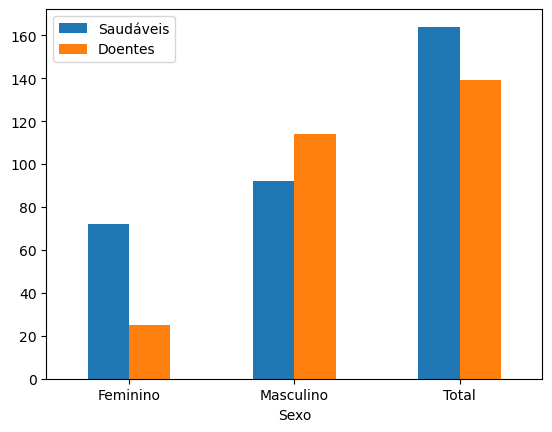

In [14]:
grafico1 = tab_sex[['saudavel', 'doente']].plot.bar(xlabel = 'Sexo')
grafico1.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
grafico1.legend(labels=['Saudáveis', 'Doentes'])

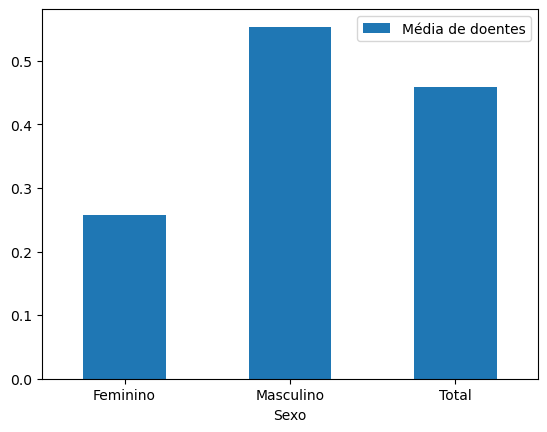

In [15]:
grafico2 = tab_sex[['media_doentes']].plot.bar()
grafico2.set_xlabel('Sexo')
grafico2.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
grafico2.legend(labels=['Média de doentes'])


Text(0.5, 1.0, 'Média de Doentes por Faixa Etária')

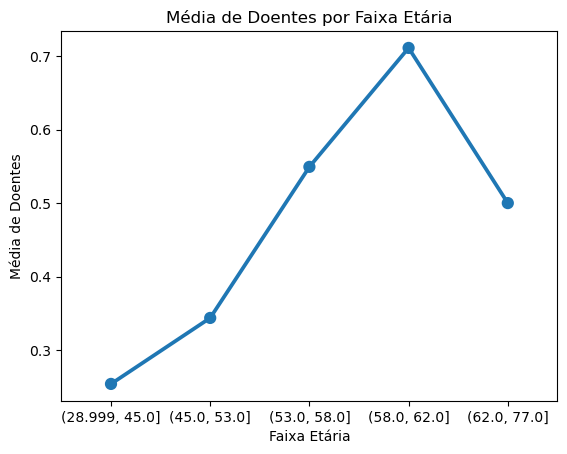

In [16]:
sns.pointplot(x = tab_age.index.drop('total'), 
             y = tab_age['media_doentes'].drop('total'))

plt.xlabel("Faixa Etária")  # Rótulo do eixo X
plt.ylabel("Média de Doentes")  # Rótulo do eixo Y
plt.title("Média de Doentes por Faixa Etária")  # Título opcional
